In [1]:
from __future__ import print_function

%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Introdução aos Métodos Numéricos

## Outline

* Introdução e Motivação
* Alguns exemplos de problemas numéricos
* Visão geral dos materiais do curso
* Logística do Curso
* <font color=red>**Pré-requisitos **</font>
* Visão geral do ambiente computacional do curso (Python, jupyter)


## O que são métodos numéricos?

* Um campo extremamente amplo 

* Definição aproximada: análise e aplicação de algoritmos para permitir que os computadores resolvam problemas em matemática, ciências, engenharia ...

* A rigor, os métodos numéricos não exigem computadores (por exemplo, o método de Newton é do século 17)

* Mas os computadores tornam as coisas práticas ... Considere esta aula uma introdução à matemática computacional

## Por que precisamos de métodos numéricos?

### Alguns problemas não têm <font color = red> ** solução definida por uma fórmula fechada ** </font>
    
   Exemplo: encontre $ f (x) = 0 $ para o polinômio de 5ª ordem
    
$$
    x^5 + 3x^2+ 2x + 3 = 0
$$

$$
    p(x) = x^5 + 3x^2+ 2x + 3 = 0
$$

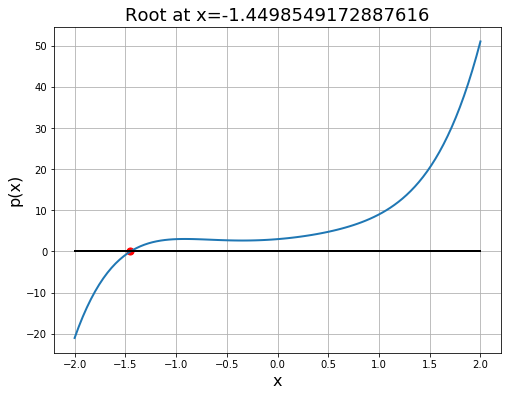

In [2]:
p = lambda x:  x**5 +3*x**2 +2*x +3

from scipy.optimize import brentq

x = numpy.linspace(-2,2,100)
x0 = brentq(p,-2,2)

plt.figure(figsize=(8,6))
plt.plot(x,p(x),linewidth=2)
plt.plot(x,numpy.zeros(x.shape),'k',linewidth=2)
plt.scatter(x0,p(x0),s=50,c='r')
plt.grid()
plt.xlabel('x',fontsize=16)
plt.ylabel('p(x)',fontsize=16)
plt.title('Root at x={}'.format(x0),fontsize=18)
plt.show()

O polinômio de 5ª ordem $ p (x) = x ^ 5 + 3x ^ 2 + 2x + 3 = 0 $ na verdade tem 5 raízes complexas

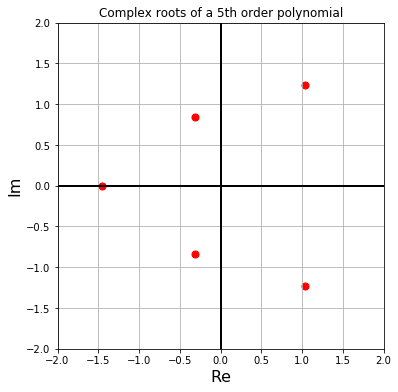

In [3]:
c = [1,0,0,3,2,3]
roots = numpy.roots(c)
fig = plt.figure(figsize=(8,6))
plt.scatter(numpy.real(roots),numpy.imag(roots),s=50,c='r')
x=numpy.linspace(-2,2)
plt.plot(x,numpy.zeros(x.shape),'k',linewidth=2)
plt.plot(numpy.zeros(x.shape),x,'k',linewidth=2)

plt.xlabel('Re',fontsize=16)
plt.ylabel('Im',fontsize=16)
plt.grid()
plt.title('Complex roots of a 5th order polynomial')
plt.axis('square')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

que requerem métodos numéricos completamente diferentes para serem encontrados.


Em geral, as raízes da maioria dos sistemas não lineares,
    
$$
     \mathbf {F} (x, y, z, t) = \mathbf{0},
$$
    
não pode ser resolvido diretamente.


### Alguns problemas são grandes demais para serem resolvidos manualmente.

Pode não ser possível calcular uma resposta exata num período de tempo razoável. Pode ser que o sistema tenha restrições incompatíveis e pode ser que não seja possível obter uma resposta que satisfaça a todos os requisitos.

<table style="width:50%">
  <tr>
     <img src="./images/linear_regression.png" width="900"/>
  </tr>
</table>

### Alguns problemas simplesmente não são analíticos

#### Análise de dados digitais

Encontrar tendências em dados reais representados sem um formula fechada (formula analítica).


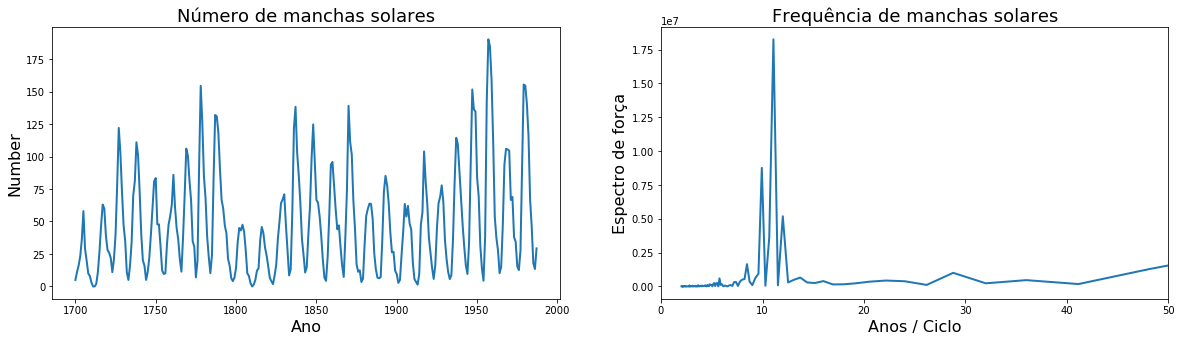

In [8]:
data = numpy.loadtxt("./data/sunspot.dat")

fig = plt.figure(figsize=(10, 5))
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1, 2, 1)
axes.plot(data[:, 0], data[:, 1],linewidth=2)
axes.set_xlabel("Ano",fontsize=16)
axes.set_ylabel("Number",fontsize=16)
axes.set_title("Número de manchas solares",fontsize=18)

axes = fig.add_subplot(1, 2, 2)
N = int(data.shape[0] / 2)
period = 1.0 / numpy.fft.fftfreq(data.shape[0])[1:N]
sunspot_freq = numpy.fft.fft(data[:, 1])[1:N]
freq = numpy.fft.fftfreq(data.shape[0])[1:N]
axes.plot(period, numpy.abs(sunspot_freq)**2,linewidth=2)
axes.set_xlabel("Anos / Ciclo",fontsize=16)
axes.set_ylabel("Espectro de força",fontsize=16)
axes.set_title("Frequência de manchas solares",fontsize=18)
axes.set_xlim((0, 50))

plt.show()

### Às vezes temos realmente de ter uma resposta

(em vez de mostrar que existe ou é único)

##### Exemplo: Solução de sistemas dinâmicos não lineares

$$
    \frac{d\mathbf{u}}{dt} = \mathbf{F}(t,\mathbf{u}),\quad \mathbf{u}(0)=\mathbf{u}_0
$$

* É possível provar que, se $ \mathbf {F} $ for suficientemente suave (Lipschitz Continuous) em algum domínio, existe uma solução exclusiva para um intervalo local no tempo (Teorema de Picard-Lindelof)
* No entanto, o teorema fornece <font color = red> ** nenhuma ** </font> maneira de encontrar uma solução com eficiência

### Exemplo: crescimento populacional não linear

Modelo Predator-Prey de Lotka-Volterra: Coelhos v. Raposas

A variável $ R $ representa o número de presas numa população. A variável $ F $ representa o número de predadores numa população. As interações entre os dois podem ser aproximadas com o sistema de equações diferenciais

$$
\begin{align}
    \frac{d R}{dt} &= R \cdot (a - bF)\\
    \frac{d F}{dt} &= F \cdot (-c + dR), 
\end{align}
$$

onde $ a, b, c, d $ são parâmetros do problema

In [13]:
# The Lotka Volterra predator prey problem using SciPy's 
#  ODE integrator solve_ivp

from scipy.integrate import solve_ivp

def lotkavolterra(t, u, a, b, c, d):
    r,f = u
    return [r*(a - b*f), f*(-c + d*r) ]

a,b,c,d = (1.5, 1, 3, 1)
f = lambda t,u : lotkavolterra(t,u,a,b,c,d)

time_span = [0, 15]
u_0 = [10, 2]
sol = solve_ivp(f, time_span , u_0, rtol=1.e-6, atol=1.e-9,dense_output = True)


### Soluções Numéricas

$$
    R_0 = 10,\, F_0 = 5\quad  a,b,c,d = (1.5, 1, 3, 1)
$$


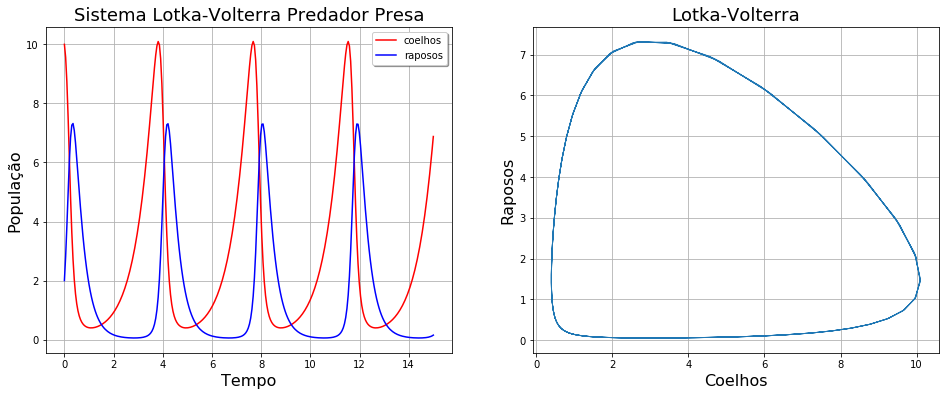

In [14]:
t = numpy.linspace(0, 15, 300)
z = sol.sol(t)

fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1,2,1)
axes.plot(t,z[0],'r',label='coelhos')
axes.plot(t,z[1],'b',label='raposos')
axes.legend(loc='best',shadow=True)
axes.set_xlabel('Tempo',fontsize=16)
axes.set_ylabel('População',fontsize=16)
axes.grid()
axes.set_title('Sistema Lotka-Volterra Predador Presa',fontsize=18)

axes = fig.add_subplot(1,2,2)
axes.plot(z[0],z[1],linewidth=1)
axes.grid()
axes.set_xlabel('Coelhos',fontsize=16)
axes.set_ylabel('Raposos',fontsize=16)
axes.set_title('Lotka-Volterra',fontsize=18)
plt.show()

### Perguntas que um ecologista ou um matemático podem fazer:
 - Onde estão os estados estacionários?
 - As soluções para o sistema são estáveis?
 - Como resolvemos o problema do valor inicial?
 - Como entendemos a dinâmica não linear?
 - Como avaliamos se esse é um bom modelo?
 - Quais impactos as pequenas alterações nos diferentes parâmetros têm?

### Big Points

* Aproximações numéricas <font color = red> ** complementam ** </font> os métodos analíticos, não os substituindo
    
* Você precisa de ambos <font color = red> ** para podermos entender ** </font> os problemas

* Os métodos numéricos são apenas parte dum problema maior a <font color=red>**Modelação matemática**</font>


## Modelação matemática

<table style=width:100%>
    <tr>
        <th></th>
        <th><img src="./images/mathModeling.png" width="800"/><th>
    </tr>
</table>



* Estritamente falando, este não é um curso de Modelagem Matemática



Geralmente, a experiência e insights sobre um sistema danos uma boa ideia de quais devem ser as suas soluções do modelo matemática. As aproximações numéricas por outro lado podem ajudar a melhorar a intuição e complementar que temos do modelo analítico. Os métodos números são muitas vezes usados para testar ideia, ampliando a nossa compreensão do problema.  Permitindo alertar para a necessidade de atualizar ou melhorar o modelo matemática por forma a satisfazer novas evidências.

O processo de descrever sistemas físicos usando expressões matemáticas é frequentemente chamado de modelação matemática. É um processo no qual a intuição, a simulação e a análise são usadas para construir expressões que imitam os comportamentos gerais dos sistemas físicos. A prática geral é começar com uma descrição básica e refiná-la ao longo de muitas iterações.

Cada etapa do processo apresenta erros. Neste curso, é central a noção de erros associados à aproximação numérica. É importante, no entanto, saber diferenciar entre os erros associados às simplificações associadas ao modelo escolhido  e os erros associados à aproximação de expressões matemáticas.

## Por que isso é emocionante?

Os computadores revolucionaram a nossa capacidade de explorar ...

[Os 10 principais algoritmos do século XX](http://www.siam.org/pdf/news/637.pdf?t=1&cn=ZmxleGlibGVfcmVjcw%3D%3D&refsrc=email&iid=658bdab6af614c83a8df1f8e02035eae&uid=755271476&nid=244+285282312)

...E ainda há mais por vir!

## As questões:
### Precisão e Eficiência

- Métodos numéricos, invariavelmente incluem uma enorme variedade de aproximações <font color = red> </font>, cada uma com <font color = red> erros  </font> 

- Bons métodos numéricos devolvem uma estimativas do erro do resultado e são caraterizados por ser estáveis na presença de erro associais ao sistema de representação.

- A análise detalhada dos algoritmos e seus erros é formalmente <font color = red> Análise Numérica </font>

## <font color=red> **Esta não é uma curso de análise numérica** </font>

Esta é principalmente uma curso de Métodos em que enfatizo

- Métodos Standard e seus erros
- Como estes métodos funcionam, quando funcionam (e quando não funcionam)
- Mostro como se podem implementar alguns dos métodos para resolver os ** seus ** problemas
- Vou tentar identificar bibliotecas onde estes métodos estão implementados para serem usados em futuros trabalhos
- <font color = red> Como fazer as escolhas certas<ul>

## Conteúdo do curso

Assuntos abordados: 

1. Ferramentas computacionais (Python,numpy).
- Fontes de erro e análise de erro.
- Método dos mínimos quadrados.
- Interpolação polinomial.
- Integração Numérica. 
- Resolução numérica de equações não lineares. 
- Integração numérica de equações diferenciais ordinárias. 

## Objetivo deste curso:

Ter critério para a escolha e compreender o funcionamento dos métodos essenciais para resolver equações diferenciais, para modekação e na computação científica.


<table style="width:100%">
  <tr>
    <th><img src="./images/siemens-volrender0000_kirby_modeling.png" width="500"/></th>
    <th><img src="./images/Fenics_tc_vm.png" width="500"/></th> 
  </tr>
    <td align=center>Modelo de turbulência da turbina eólica por <a href=http://students.uwyo.edu/akirby/>Andrew Kirby</a></th>
    <td align=center><a href=http://fenicsproject.org>FEniCS</a> Modelo FEM de um turbocompressor</th>
</table>

### Todos esses problemas requerem <font color = red> interpolação, quadratura numérica, álgebra linear numérica </font>

#### Mais PDE's, Cálculo vetorial, análise funcional, geometria computacional, programação C ++ / Python

## Logística do Curso

- 2 aulas por semana
- ~1 Trabalhos de casa por semana (todos com base em jupyter notebooks) (20%)
- 1 Teste Global(80%)
- Exame (100% ou 80%)


## Pré-requisitos do Curso

### Métodos numéricos não são particularmente difíceis ...

* no entanto ... Eles exigem significante <font color = red> ** fluência ** </font> em
    * Cálculo
    * Cálculo vetorial
    * Álgebra Linear
    * Programação: Python 3 (numpy)

## Ferramentas Computacionais

### Jupyter Notebooks

O ambiente notebook fornece um meio conveniente para trabalhar com código enquanto faz anotações. Vamos usar apenas as funcionalidades básicas espero que explore por sua conta o ambiente.

[Documentation](https://jupyter.readthedocs.io/en/latest/)

#### A "cloud"

Existem vários serviços na "cloud" quepermitem executar Jupyter Notebooks:
 - [<font color=red>Columbia's CUIT Jupyter Hub server</font>](https://apma4300.columbiajupyter2.org/)
 - [Google's Colaboratory](https://colab.research.google.com)
 - [Microsoft Azure Notebooks](https://notebooks.azure.com)
 - [CoCalc](https://cocalc.com/)
 
Recumento [Google's Colaboratory](https://colab.research.google.com) para isso têm de ter uma conta na Google, i.e. um email do Gmail. 

### Obtenção dos Notebooks

Todos os notebooks são encontrados em [github](http://github.com/CalculoNumerico1920SVLeandro/CN-1920SV-notebook).


### TRAGA O SEU PORTÁTIL!

As demonstrações que vou fazer são melhores com a sua participação!